In [32]:
!pip install spotipy

import pandas as pd
import numpy as np
import requests
import json
import spotipy
from pprint import pprint
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [18]:
test_df = pd.read_csv("Final_2019_Chart.csv")
test_df.head()

,2019_bb_rank,artist_name
0,1,Post Malone
1,2,Ariana Grande
2,3,Billie Eilish
3,4,Khalid
4,5,Drake


In [19]:

test_df['name2'] = ""
test_df['genres'] = ""
test_df['popularity'] = ""
test_df['uri_spotify'] = ""
test_df['followers'] = ""

test_df.head()

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers
0,1,Post Malone,,,,,
1,2,Ariana Grande,,,,,
2,3,Billie Eilish,,,,,
3,4,Khalid,,,,,
4,5,Drake,,,,,


In [20]:
#   scatter plot of number of followers vs popularity
#   bargraph top ten billboard and popularity
#   scatter plot correlation of followers vs billboard placement
#   plt.scatter(who_data.iloc[:,1],who_data.iloc[:,8])
#plt.xlabel('followers')
#plt.ylabel('popularity)')


In [21]:
user_id ='72c82b45eef743cb8a144c07882d9689'
token ='0b3a9740301246d790f7f91895124b38'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(user_id,token))

params= {
    "name2": "name", 
    "popularity": "popularity",
    "genres": "genres",
    "uri_spotify": "uri",
    "followers": "followers"
}



In [22]:
for index, row in test_df[:101].iterrows():

    # get restaurant type from df
    person = row['artist_name']

    # add keyword to params dict
    params['keyword'] = person

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {person}.")
    results = spotify.search(q=f'artist: {person}', type='artist')
    
    artist_data = results['artists']['items']
    
    try:
        #print(f"Artist {person} is in dataset")
        #print(f"Trying to get name")
        test_df.loc[index, 'name2'] = artist_data[0]['name']
        #print(f"Trying to get popularity")
        test_df.loc[index, 'popularity'] = artist_data[0]['popularity']
        #print(f"Trying to get genres")
        #print(artist_data[0]['genres'])
        #print(type(artist_data[0]['genres']))
        test_df.loc[index, 'genres'] = str(artist_data[0]['genres'])
        test_df.loc[index, 'uri_spotify'] = str(artist_data[0]['uri'])
        test_df.loc[index, 'followers'] = str(artist_data[0]['followers']['total'])
    except Exception as e:
        print(e)

Retrieving Results for Index 0: Post Malone.
Retrieving Results for Index 1: Ariana Grande.
Retrieving Results for Index 2: Billie Eilish.
Retrieving Results for Index 3: Khalid.
Retrieving Results for Index 4: Drake.
Retrieving Results for Index 5: Travis Scott.
Retrieving Results for Index 6: Ed Sheeran.
Retrieving Results for Index 7: Taylor Swift.
Retrieving Results for Index 8: Lil Nas X.
Retrieving Results for Index 9: Halsey.
Retrieving Results for Index 10: Jonas Brothers.
Retrieving Results for Index 11: Juice WRLD.
Retrieving Results for Index 12: Cardi B.
Retrieving Results for Index 13: DaBaby.
Retrieving Results for Index 14: BTS.
Retrieving Results for Index 15: Panic! At The Disco.
Retrieving Results for Index 16: Luke Combs.
Retrieving Results for Index 17: Lil Baby.
Retrieving Results for Index 18: Shawn Mendes.
Retrieving Results for Index 19: Lizzo.
Retrieving Results for Index 20: Meek Mill.
Retrieving Results for Index 21: Queen.
Retrieving Results for Index 22: Da

In [23]:

test_df.loc[test_df['name2'] != '']

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers
0,1,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29173640
1,2,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52571724
2,3,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34697267
3,4,Khalid,Khalid,"['alternative r&b', 'pop']",93,spotify:artist:6LuN9FCkKOj5PcnpouEgny,12829933
4,5,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50593376
...,...,...,...,...,...,...,...
95,96,Fleetwood Mac,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",88,spotify:artist:08GQAI4eElDnROBrJRGE0X,5464936
96,97,The Weeknd,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,25562055
97,98,Eric Church,Eric Church,"['contemporary country', 'country', 'country r...",78,spotify:artist:2IvkS5MXK0vPGnwyJsrEyV,2745679
98,99,benny blanco,benny blanco,"['electropop', 'pop', 'pop rap']",85,spotify:artist:5CiGnKThu5ctn9pBxv7DGa,653196


In [24]:

#### SAVED CODE DO NOT DELETE #spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

name = 'Taylor Swift'

results = spotify.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'])
    print(artist['popularity'])
    print(artist['name'], artist['images'][0]['url'])

Taylor Swift
95
Taylor Swift https://i.scdn.co/image/a37efbc7fd3f5f5df81b48ce9c6de53820b239c1


In [25]:
test_df.head()

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers
0,1,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29173640
1,2,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52571724
2,3,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34697267
3,4,Khalid,Khalid,"['alternative r&b', 'pop']",93,spotify:artist:6LuN9FCkKOj5PcnpouEgny,12829933
4,5,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50593376


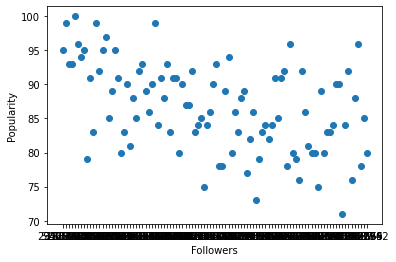

In [27]:
plt.scatter(test_df.iloc[:,6],test_df.iloc[:,4])
plt.xlabel('Followers')
plt.ylabel('Popularity')
plt.show()

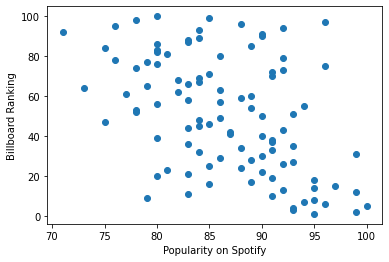

In [28]:
plt.scatter(test_df.iloc[:,4],test_df.iloc[:,0])
plt.xlabel('Popularity on Spotify')
plt.ylabel('Billboard Ranking')
plt.show()

The correlation between both factors is -0.47


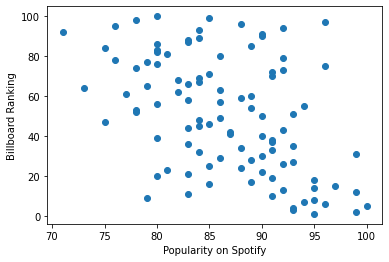

In [35]:
Popularity = test_df.iloc[:,4]
Billboard_Ranking = test_df.iloc[:,0]
correlation = st.pearsonr(Popularity,Billboard_Ranking)
plt.scatter(Popularity,Billboard_Ranking)
plt.xlabel('Popularity on Spotify')
plt.ylabel('Billboard Ranking')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [50]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(Popularity, Billboard_Ranking)

AttributeError: 'float' object has no attribute 'shape'

In [36]:
regress_values = Popularity * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Popularity,Billboard_Ranking)
plt.plot(Popularity,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Popularity on Spotify')
plt.ylabel('Billboard Ranking')
print(f"The r-squared is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

<BarContainer object of 10 artists>

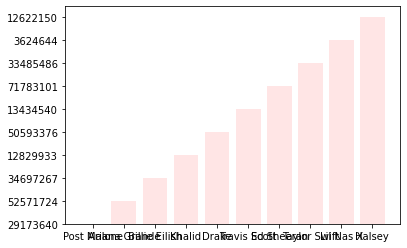

In [37]:
x_axis = test_df.iloc[0:10,1]
y_axis = test_df.iloc[0:10,6]
plt.bar(x_axis, y_axis, color='r', alpha=0.1, align="center")

TypeError: bar() missing 1 required positional argument: 'height'

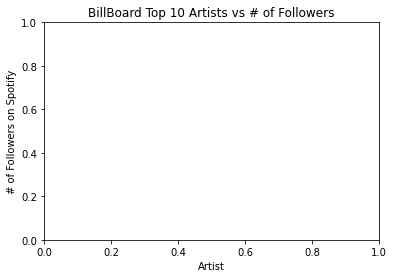

In [39]:
plt.title("BillBoard Top 10 Artists vs # of Followers")
plt.xlabel("Artist")
plt.ylabel("# of Followers on Spotify")
x_axis = test_df.iloc[0:10,1]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

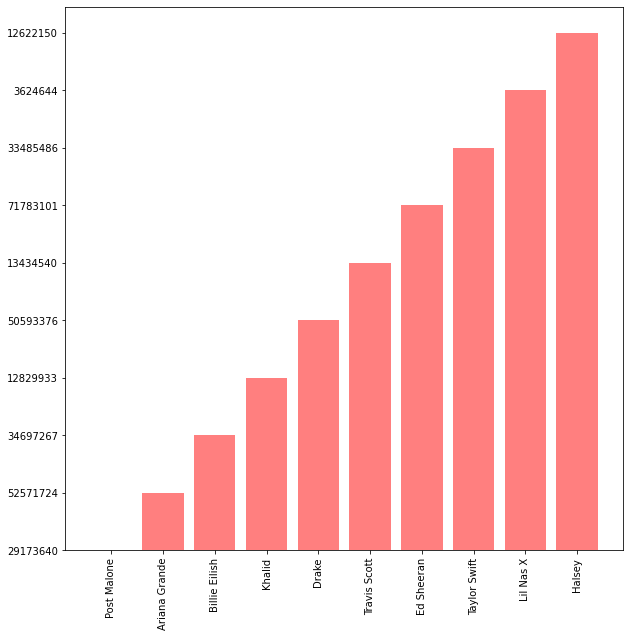

In [41]:
plt.figure(figsize=(10,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")

In [42]:
x_axis

0      Post Malone
1    Ariana Grande
2    Billie Eilish
3           Khalid
4            Drake
5     Travis Scott
6       Ed Sheeran
7     Taylor Swift
8        Lil Nas X
9           Halsey
Name: artist_name, dtype: object

In [47]:
y_axis.astype(int)

0    29173640
1    52571724
2    34697267
3    12829933
4    50593376
5    13434540
6    71783101
7    33485486
8     3624644
9    12622150
Name: followers, dtype: int32

(0.0, 6.0)

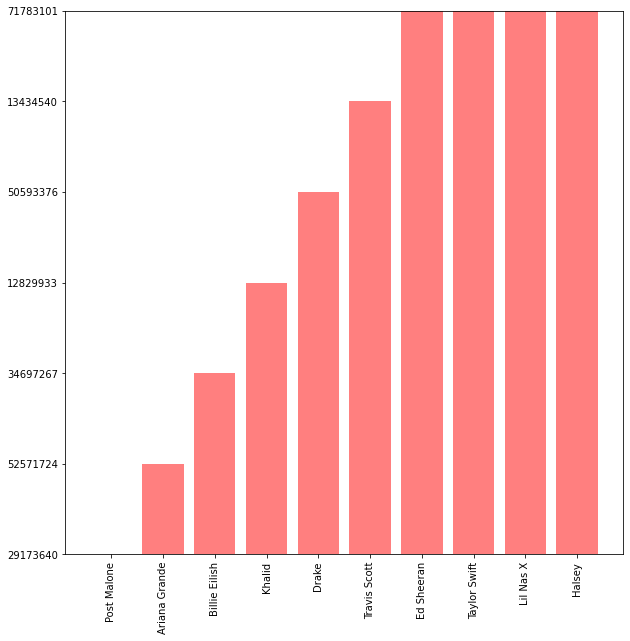

In [49]:
plt.figure(figsize=(10,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.ylim(0, max(y_axis))